## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata)

combined_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
# Find the mean
Tumor_group_df = combined_df.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)']
avg_tumor_df = Tumor_group_df.mean()

# Convert to DataFrame
tumors_df = pd.DataFrame(avg_tumor_df)

# Preview DataFrame
tumors_df.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325

In [4]:
# Find the Standard Error

tumor_se = Tumor_group_df.sem()

# Convert to DataFrame

tumor_se_df = pd.DataFrame(tumor_se)


# Preview DataFrame
tumor_se_df.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731

In [5]:
# Data Munging
tumor_se_df = tumor_se_df.reset_index()

pivot_se_df = tumor_se_df.pivot(index='Timepoint',columns='Drug Regimen',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_se_df.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


## Bar plots

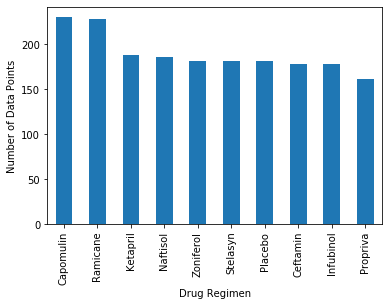

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = combined_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

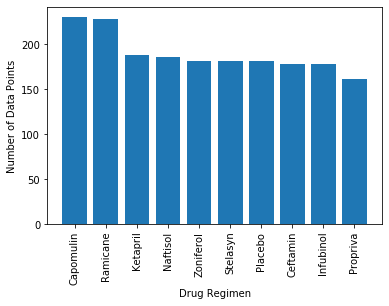

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

counts = combined_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

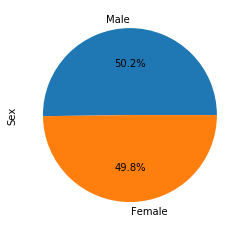

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

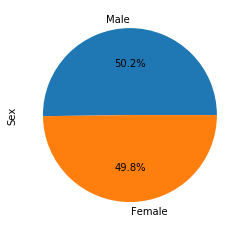

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

final_tumor = combined_df.groupby(["Mouse ID"]).max()
final_tumor = final_tumor.reset_index()


# Merging the data
data_merge = final_tumor[['Mouse ID','Timepoint']].merge(combined_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = data_merge.loc[data_merge["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = data_merge.loc[data_merge["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = data_merge.loc[data_merge["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = data_merge.loc[data_merge["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine Capomulin outliers
cap_outlier = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_outlier[0.25]
cap_upperq = cap_outlier[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [11]:
#Determine Ramicane outliers

ram_outlier = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_outlier[0.25]
ram_upperq = ram_outlier[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [12]:
#Determine Infubinol outliers

infub_outlier = infubinol.quantile([.25,.5,.75])
infub_lowerq = infub_outlier[0.25]
infub_upperq = infub_outlier[0.75]
infub_iqr = infub_upperq-infub_lowerq
infub_lower_bound = infub_lowerq - (1.5*infub_iqr)
infub_upper_bound = infub_upperq + (1.5*infub_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < infub_lower_bound) | (infubinol > infub_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [13]:
#Determine Ceftamin outliers

cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


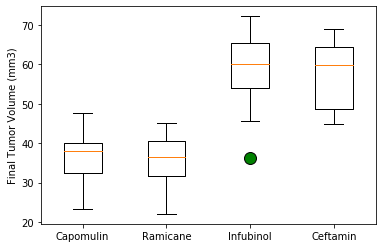

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_volume = dict(markerfacecolor='green',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=tumor_volume)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

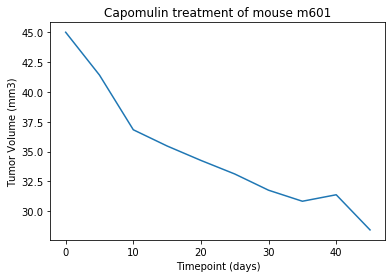

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_info = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin"]
mouse_info = capomulin_info.loc[capomulin_info['Mouse ID']== 'm601']
plt.plot(mouse_info['Timepoint'],mouse_info['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse m601')
plt.show()

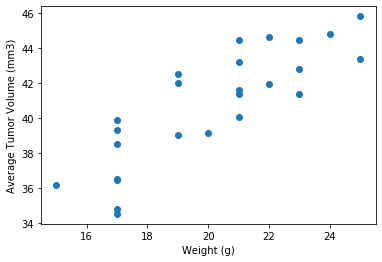

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_info = combined_df.loc[combined_df['Drug Regimen'] == "Capomulin"]
capomulin_mean = capomulin_info.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


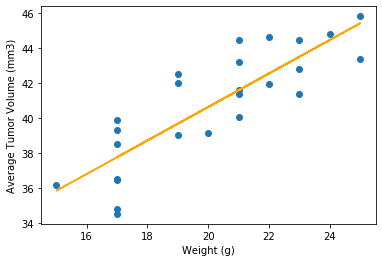

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
y_values = capomulin_mean['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.plot(capomulin_mean['Weight (g)'],y_values,color="orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()